# Lab Assignment 3:  Naive Bayes
Implement the Naive Bayes classifier using the IRIS and HEART(SPECT dataset) datasets.
Implement k-fold cross-validation with k=10. Compute the correctly classified instances, incorrectly classified instances; root mean squared error, relative absolute error, True positive rate, False positive rate, Confusion matrix and Kappa score. Display the evaluation metrics for each fold separately and then print all folds' final average evaluation metrics.
Please do not use built-in functions.



IRIS dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
iris= files.upload()

Saving iris.data to iris.data


In [ ]:
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']

In [ ]:
data = pd.read_csv ('iris.data', names= data_names)

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data["label"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: label, dtype: int64

In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


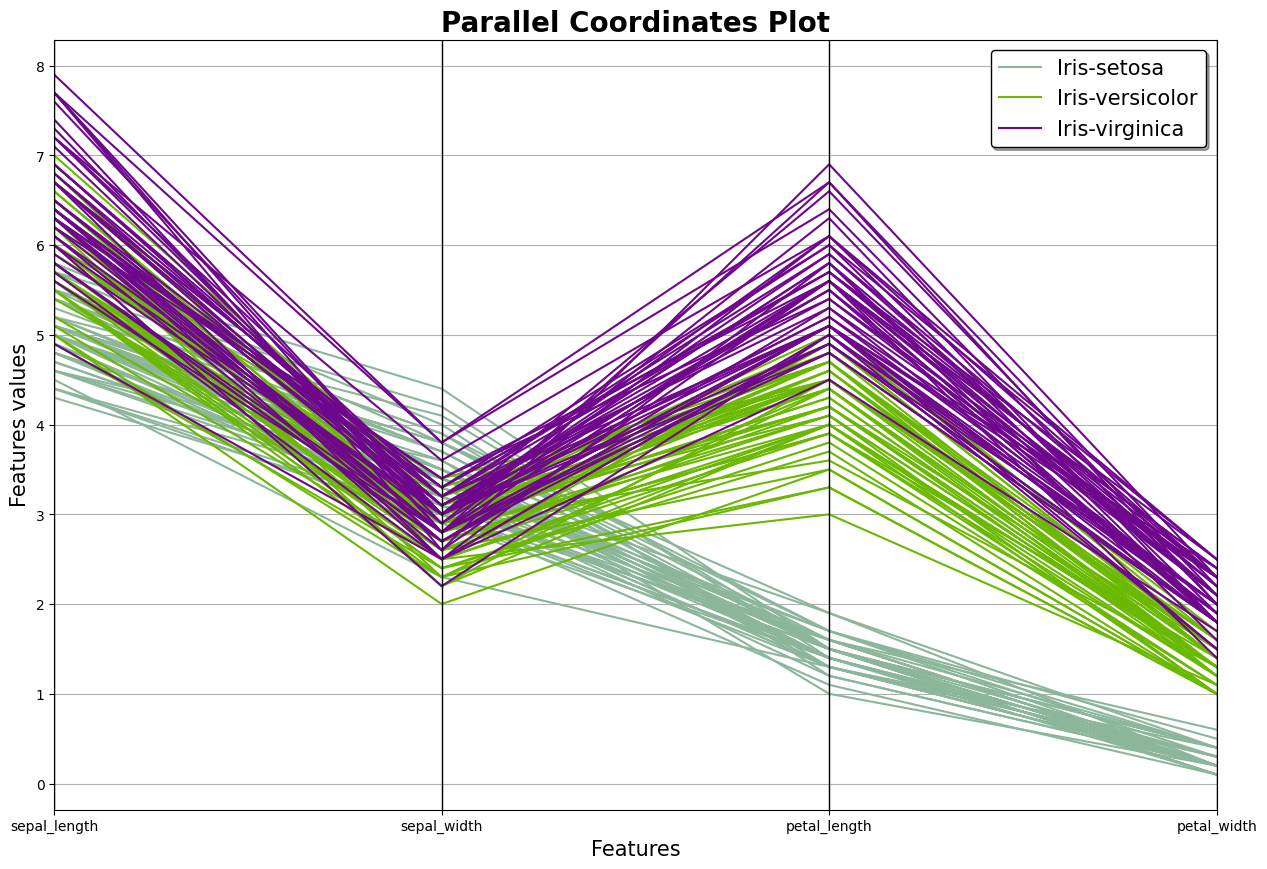

In [ ]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
parallel_coordinates(data, "label")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [ ]:
import seaborn as sns

<Figure size 640x480 with 0 Axes>

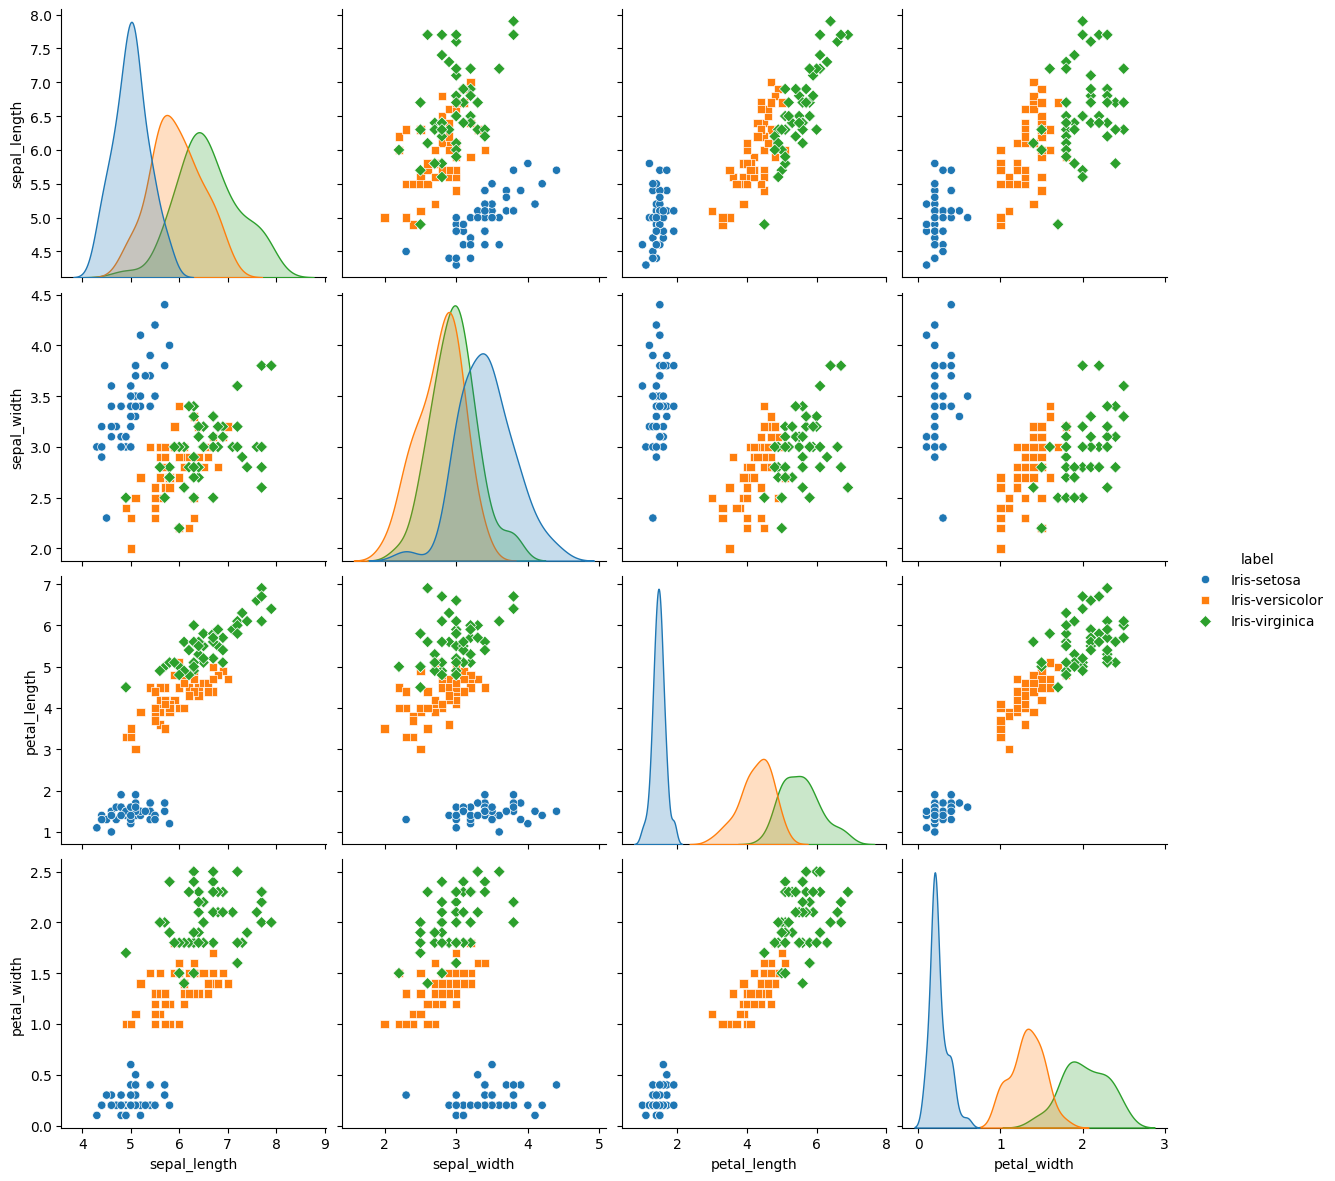

In [ ]:
plt.figure()
sns.pairplot(data, hue = "label", height=3, markers=["o", "s", "D"])
plt.show()

<Figure size 640x480 with 0 Axes>

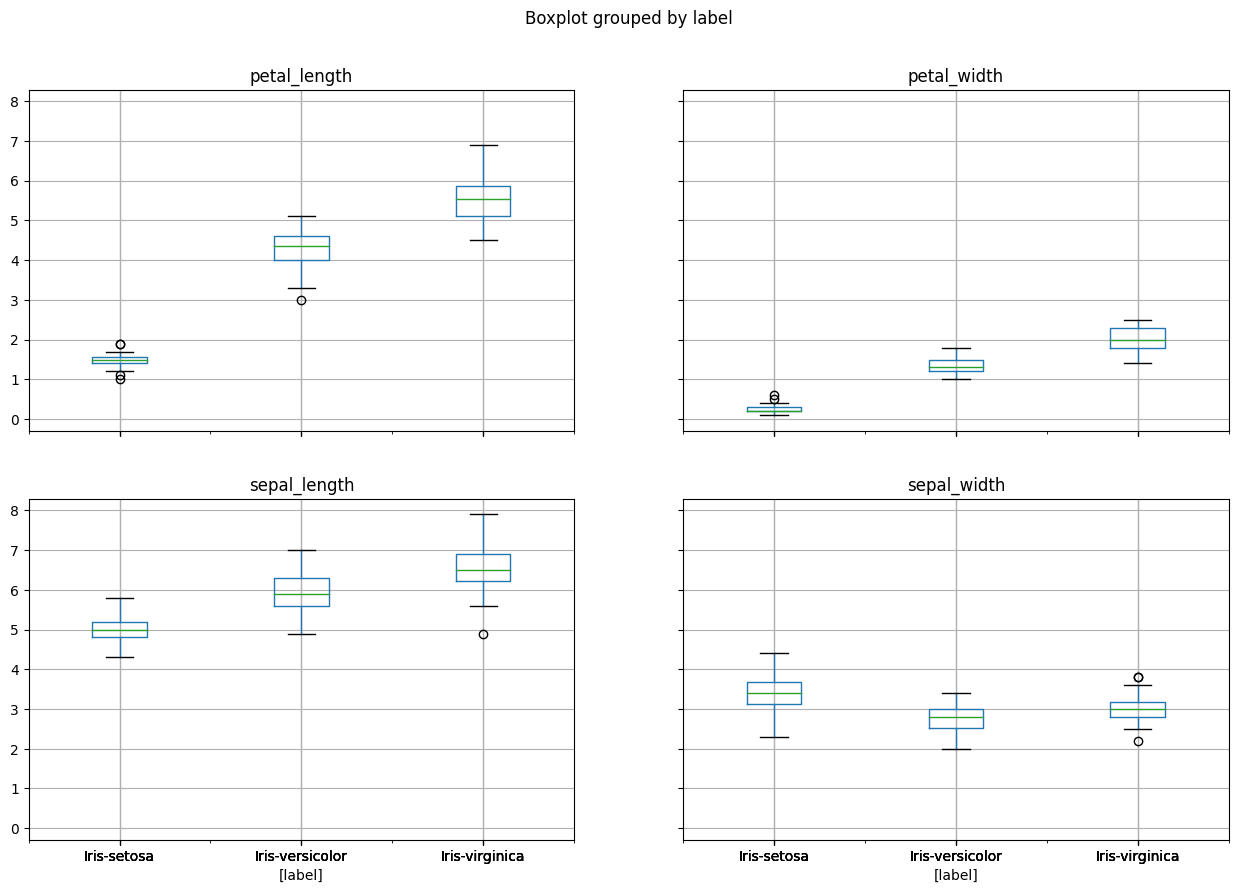

In [ ]:
plt.figure()
data.boxplot(by="label", figsize=(15, 10))
plt.show()

# Naive Bayes for IRIS

In [ ]:
from csv import reader
from math import sqrt
from math import exp
from math import pi

In [ ]:
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated

In [ ]:
def mean(numbers):
	return sum(numbers)/float(len(numbers))

In [ ]:
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)

In [ ]:
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries

In [ ]:
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries

In [ ]:
def calculate_probability(x, mean, stdev):
	if stdev==0: return 0
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [ ]:
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, _ = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

In [ ]:
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

In [ ]:
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
		print('[%s] => %d' % (value, i))
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup

In [ ]:
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset

In [ ]:
def predict(summaries, row):
	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

In [ ]:
from csv import reader
dataset= load_csv('iris.data')
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
str_column_to_int(dataset, len(dataset[0])-1)
model = summarize_by_class(dataset)
row = [5.7,2.9,4.2,1.3]
label = predict(model, row)
print('Data=%s, Predicted: %s' % (row, label))

[Iris-setosa] => 0
[Iris-virginica] => 1
[Iris-versicolor] => 2
Data=[5.7, 2.9, 4.2, 1.3], Predicted: 2


In [ ]:
def naive_bayes(train, test):
 summarize = summarize_by_class(train)
 predictions = list()
 for row in test:
    output = predict(summarize, row)
    predictions.append(output)
 return(predictions)

In [ ]:
import random

In [ ]:
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = random.randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct, len(actual) - correct


def rmse_metric(actual, predicted):
    if (len(actual)==0): return 0.0
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

def rae_metric(actual, predicted):
    sum_error = 0.0
    count = 0
    for i in range(len(actual)):
        if actual[i] != 0:
            sum_error += abs(predicted[i] - actual[i]) / actual[i]
            count += 1
    if count == 0:
        return 0
    return sum_error / float(count)


def confusion_matrix(actual, predicted):
    num_classes = 3
    cm = [[0] * num_classes for _ in range(num_classes)]
    for i in range(len(actual)):
        true_class = actual[i]
        pred_class = predicted[i]
        cm[true_class][pred_class] += 1
    return cm

def tpr_metric(actual, predicted):
  cnf_matrix= confusion_matrix(actual, predicted)
  cnf_matrix= np.array(cnf_matrix)
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)
  TPR = TP/ (TP + FN)
  return TPR

def fpr_metric(actual, predicted):
  cnf_matrix= confusion_matrix(actual, predicted)
  cnf_matrix= np.array(cnf_matrix)
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)
  FPR = FP/(FP+TN)
  return FPR

def kappa_score(actual, predicted):
    num_classes=3
    cm = confusion_matrix(actual, predicted)
    total_samples = len(actual)
    total_agreements = sum(cm[i][i] for i in range(num_classes))
    po = total_agreements / total_samples
    row_totals = [sum(cm[i]) for i in range(num_classes)]
    col_totals = [sum(cm[j][i] for j in range(num_classes)) for i in range(num_classes)]
    pe = sum((row_totals[i] * col_totals[i]) / (total_samples ** 2) for i in range(num_classes))
    kappa = (po - pe) / (1 - pe) if (1 - pe) != 0 else 0
    return kappa


def evaluate_algorithm(dataset, algorithm, n_folds):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set)
        actual = [row[-1] for row in fold]
        correct, incorrect = accuracy_metric(actual, predicted)
        rmse = rmse_metric(actual, predicted)
        rae = rae_metric(actual, predicted)
        cm= confusion_matrix(actual, predicted)
        tpr= tpr_metric(actual, predicted)
        fpr = fpr_metric(actual, predicted)
        kappa = kappa_score(actual, predicted)
        scores.append((correct, incorrect, tpr, fpr, rmse, rae, cm, kappa))
    return scores


In [ ]:
print (tpr_metric([0,1,2,1,0,2], [0,1,2,1,0,2] ))

[1. 1. 1.]


[Iris-setosa] => 0
[Iris-virginica] => 1
[Iris-versicolor] => 2
Fold 1:
  Correctly classified instances: 13
  Incorrectly classified instances: 2
  Accuracy: 86.67%
  Root Mean Squared Error: 0.3651483716701107
  Relative Absolute Error: 0.2
  True Positive Rate: [1.   0.75 1.  ]
  False Positive Rate: [0.         0.         0.15384615]


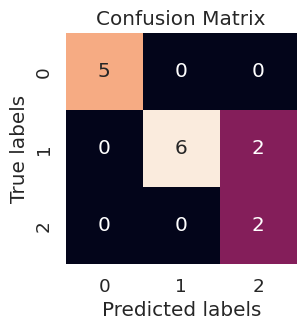

  Kappa Score: 0.7916666666666667
Fold 2:
  Correctly classified instances: 15
  Incorrectly classified instances: 0
  Accuracy: 100.00%
  Root Mean Squared Error: 0.0
  Relative Absolute Error: 0.0
  True Positive Rate: [1. 1. 1.]
  False Positive Rate: [0. 0. 0.]


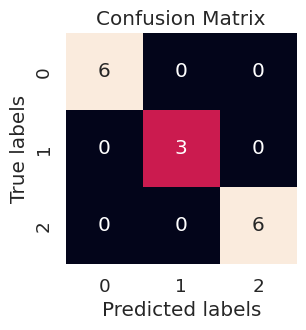

  Kappa Score: 1.0
Fold 3:
  Correctly classified instances: 14
  Incorrectly classified instances: 1
  Accuracy: 93.33%
  Root Mean Squared Error: 0.2581988897471611
  Relative Absolute Error: 0.05
  True Positive Rate: [1.         1.         0.83333333]
  False Positive Rate: [0.         0.09090909 0.        ]


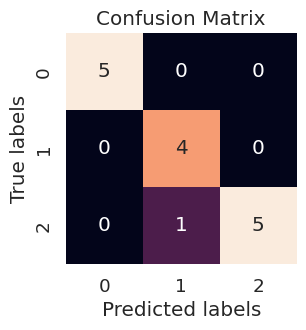

  Kappa Score: 0.9
Fold 4:
  Correctly classified instances: 15
  Incorrectly classified instances: 0
  Accuracy: 100.00%
  Root Mean Squared Error: 0.0
  Relative Absolute Error: 0.0
  True Positive Rate: [1. 1. 1.]
  False Positive Rate: [0. 0. 0.]


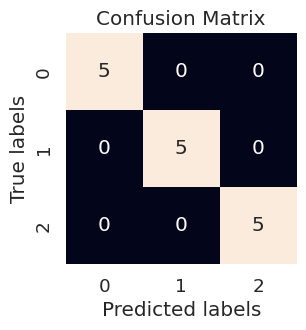

  Kappa Score: 1.0
Fold 5:
  Correctly classified instances: 15
  Incorrectly classified instances: 0
  Accuracy: 100.00%
  Root Mean Squared Error: 0.0
  Relative Absolute Error: 0.0
  True Positive Rate: [1. 1. 1.]
  False Positive Rate: [0. 0. 0.]


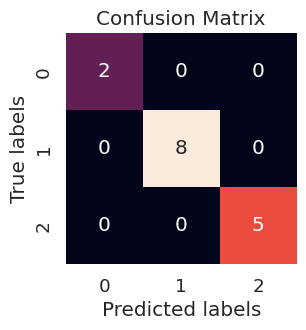

  Kappa Score: 1.0
Fold 6:
  Correctly classified instances: 15
  Incorrectly classified instances: 0
  Accuracy: 100.00%
  Root Mean Squared Error: 0.0
  Relative Absolute Error: 0.0
  True Positive Rate: [1. 1. 1.]
  False Positive Rate: [0. 0. 0.]


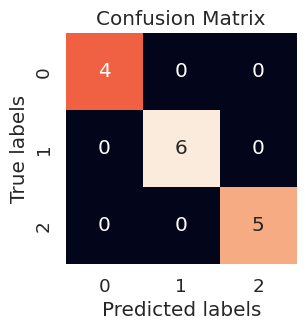

  Kappa Score: 1.0
Fold 7:
  Correctly classified instances: 15
  Incorrectly classified instances: 0
  Accuracy: 100.00%
  Root Mean Squared Error: 0.0
  Relative Absolute Error: 0.0
  True Positive Rate: [1. 1. 1.]
  False Positive Rate: [0. 0. 0.]


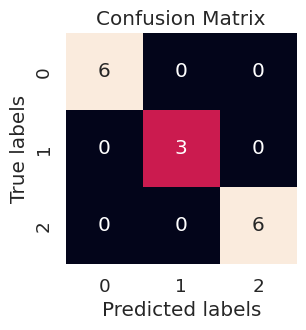

  Kappa Score: 1.0
Fold 8:
  Correctly classified instances: 13
  Incorrectly classified instances: 2
  Accuracy: 86.67%
  Root Mean Squared Error: 0.3651483716701107
  Relative Absolute Error: 0.13636363636363635
  True Positive Rate: [1.         0.85714286 0.75      ]
  False Positive Rate: [0.         0.125      0.09090909]


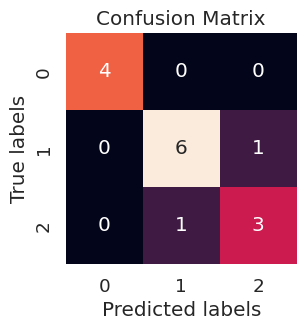

  Kappa Score: 0.7916666666666667
Fold 9:
  Correctly classified instances: 13
  Incorrectly classified instances: 2
  Accuracy: 86.67%
  Root Mean Squared Error: 0.3651483716701107
  Relative Absolute Error: 0.13636363636363635
  True Positive Rate: [1.         0.75       0.85714286]
  False Positive Rate: [0.         0.09090909 0.125     ]


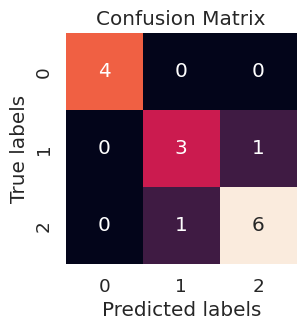

  Kappa Score: 0.7916666666666667
Fold 10:
  Correctly classified instances: 15
  Incorrectly classified instances: 0
  Accuracy: 100.00%
  Root Mean Squared Error: 0.0
  Relative Absolute Error: 0.0
  True Positive Rate: [1. 1. 1.]
  False Positive Rate: [0. 0. 0.]


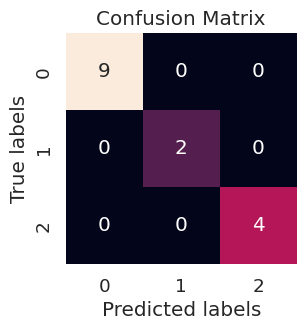

  Kappa Score: 1.0


In [ ]:
random.seed(1)
filename = 'iris.data'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
str_column_to_int(dataset, len(dataset[0])-1)
n_folds = 10
scores = evaluate_algorithm(dataset, naive_bayes, n_folds)

total_correct = sum(score[0] for score in scores)
total_incorrect = sum(score[1] for score in scores)
total_accuracy = total_correct / (total_correct + total_incorrect) * 100.0

for i, score in enumerate(scores, start=1):
    accuracy = score[0] / (score[0] + score[1]) * 100.0
    print(f"Fold {i}:")
    print(f"  Correctly classified instances: {score[0]}")
    print(f"  Incorrectly classified instances: {score[1]}")
    print(f"  Accuracy: {accuracy:.2f}%")
    print(f"  Root Mean Squared Error: {score[4]}")
    print(f"  Relative Absolute Error: {score[5]}")
    print(f"  True Positive Rate: {score[2]}")
    print(f"  False Positive Rate: {score[3]}")
    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1.2)
    sns.heatmap(np.array(score[6]), annot=True, fmt='g', cbar=False, square=True)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    print(f"  Kappa Score: {score[7]}")


Average Evaluation Metrics:
  Mean Correctly classified instances: 14.3
  Mean Incorrectly classified instances: 0.7
  Mean Accuracy: 95.33%
  Mean Root Mean Squared Error: 0.13536440047574932
  Mean Relative Absolute Error: 0.05227272727272727
  Mean True Positive Rate: [1.         0.93571429 0.94404762]
  Mean False Positive Rate: [0.         0.03068182 0.03697552]
  Mean Confusion Matrix:


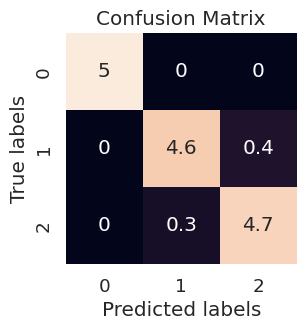

  Mean Kappa Score: 0.9275


In [ ]:
average_correct = total_correct / n_folds
average_incorrect = total_incorrect / n_folds
average_accuracy = total_accuracy
average_rmse = sum(score[4] for score in scores) / n_folds
average_rae = sum(score[5] for score in scores) / n_folds
average_tp = sum(score[2] for score in scores) / n_folds
average_fp = sum(score[3] for score in scores) / n_folds
average_kappa = sum(score[7] for score in scores) / n_folds
individual_matrices = [score[6] for score in scores]
total_00 = sum(matrix[0][0] for matrix in individual_matrices)/n_folds
total_01 = sum(matrix[0][1] for matrix in individual_matrices)/n_folds
total_02 = sum(matrix[0][2] for matrix in individual_matrices)/n_folds
total_10 = sum(matrix[1][0] for matrix in individual_matrices)/n_folds
total_11 = sum(matrix[1][1] for matrix in individual_matrices)/n_folds
total_12 = sum(matrix[1][2] for matrix in individual_matrices)/n_folds
total_20 = sum(matrix[2][0] for matrix in individual_matrices)/n_folds
total_21 = sum(matrix[2][1] for matrix in individual_matrices)/n_folds
total_22 = sum(matrix[2][2] for matrix in individual_matrices)/n_folds

average_confusion_matrix = [[total_00, total_01, total_02], [total_10, total_11, total_12], [total_20, total_21, total_22]]

print("Average Evaluation Metrics:")
print(f"  Mean Correctly classified instances: {total_correct / n_folds}")
print(f"  Mean Incorrectly classified instances: {total_incorrect / n_folds}")
print(f"  Mean Accuracy: {total_accuracy:.2f}%")
print(f"  Mean Root Mean Squared Error: {average_rmse}")
print(f"  Mean Relative Absolute Error: {average_rae}")
print(f"  Mean True Positive Rate: {average_tp}")
print(f"  Mean False Positive Rate: {average_fp}")
print(f"  Mean Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(np.array(average_confusion_matrix), annot=True, fmt='g', cbar=False, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print(f"  Mean Kappa Score: {average_kappa}")



# Heart Spect

In [ ]:
from google.colab import files
df2= files.upload()

Saving spect_train.csv to spect_train.csv


In [ ]:
data = pd.read_csv ('spect_train.csv')

In [ ]:
data

,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,70,75,72,72,67,71,71,78,63,...,66,67,68,70,70,71,64,67,56,54
76,0,59,57,67,71,66,68,68,70,56,...,62,64,56,53,71,68,64,63,56,56
77,0,67,64,73,75,77,77,74,70,65,...,61,64,65,60,68,75,74,80,67,68
78,0,68,65,72,72,47,74,76,74,67,...,64,69,71,73,73,75,68,56,58,44


In [ ]:
data["OVERALL_DIAGNOSIS"].value_counts()

1    40
0    40
Name: OVERALL_DIAGNOSIS, dtype: int64

In [ ]:
data.describe()

,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,0.500000,68.650000,67.55000,69.550000,70.850000,67.100000,67.687500,72.075000,71.387500,64.362500,...,65.18750,64.662500,65.612500,65.01250,69.437500,68.412500,66.33750,65.100000,55.975000,55.075000
std,0.503155,5.594075,6.88403,5.901941,6.326757,6.251278,6.622925,4.090047,5.715831,7.425996,...,5.71273,7.538834,7.694308,9.44336,7.809186,8.582723,10.62591,11.345662,10.779698,12.119422
min,0.000000,57.000000,51.00000,52.000000,51.000000,47.000000,46.000000,63.000000,56.000000,26.000000,...,31.00000,13.000000,33.000000,23.00000,31.000000,30.000000,31.00000,30.000000,11.000000,11.000000
25%,0.000000,64.750000,64.00000,66.000000,67.000000,63.750000,63.750000,68.750000,69.000000,61.000000,...,63.00000,63.000000,62.750000,62.00000,65.000000,65.000000,64.00000,63.000000,53.000000,52.750000
50%,0.500000,69.000000,67.00000,70.000000,72.000000,68.000000,68.500000,72.500000,72.000000,65.000000,...,66.00000,65.500000,66.000000,66.50000,70.500000,71.000000,69.00000,68.000000,59.000000,58.000000
75%,1.000000,72.000000,73.00000,74.000000,75.250000,71.000000,71.250000,75.000000,75.000000,68.250000,...,68.00000,69.000000,71.000000,71.00000,74.000000,74.000000,73.25000,71.000000,63.000000,63.000000
max,1.000000,80.000000,81.00000,82.000000,84.000000,78.000000,89.000000,79.000000,83.000000,77.000000,...,73.00000,73.000000,77.000000,77.00000,83.000000,80.000000,79.00000,83.000000,71.000000,73.000000


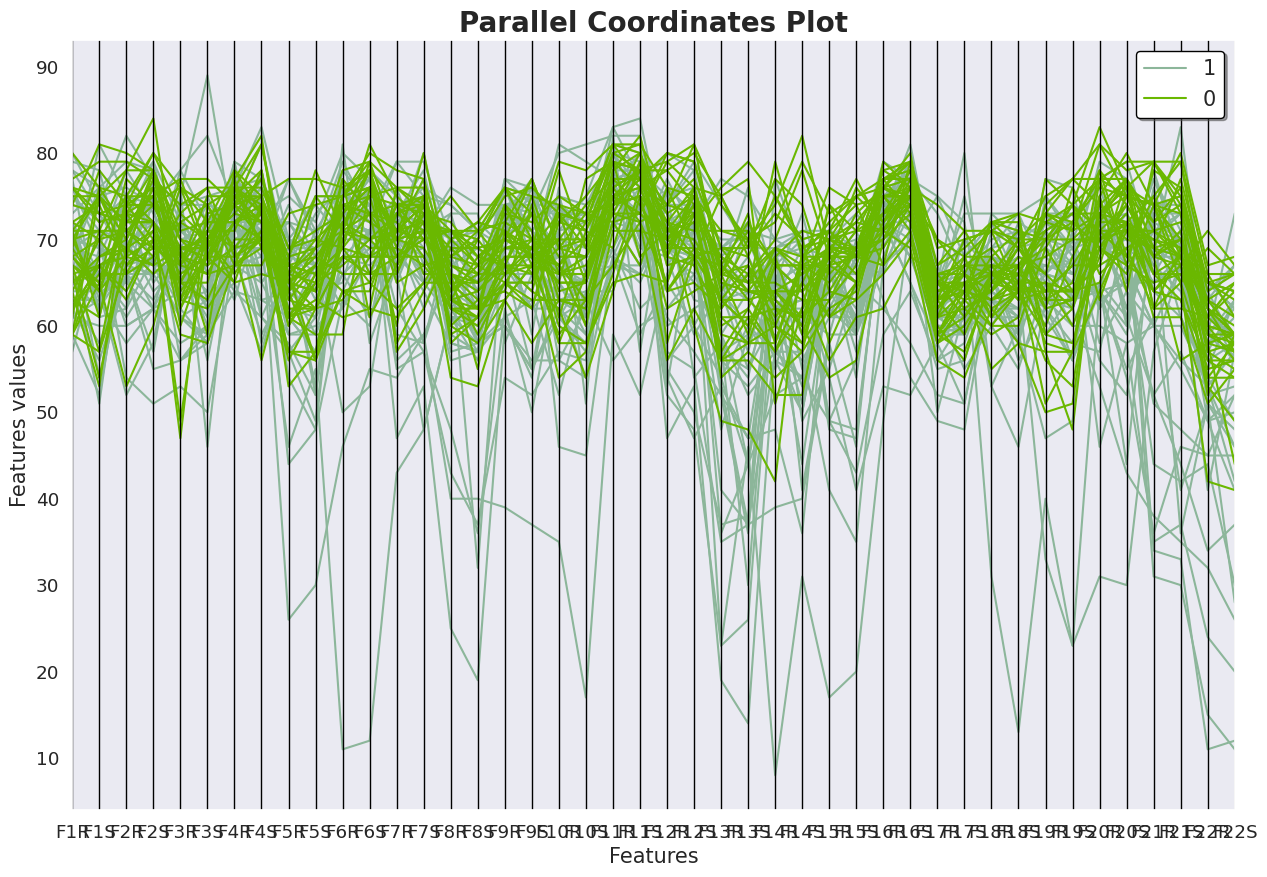

In [ ]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
parallel_coordinates(data, "OVERALL_DIAGNOSIS")
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [ ]:
data_train_binary = pd.read_csv('spect_train.csv')
print(pd.Series({"Memory usage": "{:.2f} MB".format(data_train_binary.memory_usage().sum()/(1024*1024)),
                 "Dataset shape": "{}".format(data_train_binary.shape)}).to_string())
data_train_binary.head()

Memory usage      0.03 MB
Dataset shape    (80, 45)


,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41


In [ ]:
random.seed(1)
filename = 'spect_train.csv'
dataset = load_csv(filename)

In [ ]:
for row in dataset[:5]:
    print(row)

['OVERALL_DIAGNOSIS', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R', 'F5S', 'F6R', 'F6S', 'F7R', 'F7S', 'F8R', 'F8S', 'F9R', 'F9S', 'F10R', 'F10S', 'F11R', 'F11S', 'F12R', 'F12S', 'F13R', 'F13S', 'F14R', 'F14S', 'F15R', 'F15S', 'F16R', 'F16S', 'F17R', 'F17S', 'F18R', 'F18S', 'F19R', 'F19S', 'F20R', 'F20S', 'F21R', 'F21S', 'F22R', 'F22S']
['1', '59', '52', '70', '67', '73', '66', '72', '61', '58', '52', '72', '71', '70', '77', '66', '65', '67', '55', '61', '57', '68', '66', '72', '74', '63', '64', '56', '54', '67', '54', '76', '74', '65', '67', '66', '56', '62', '56', '72', '62', '74', '74', '64', '67']
['1', '72', '62', '69', '67', '78', '82', '74', '65', '69', '63', '70', '70', '72', '74', '70', '71', '72', '75', '66', '65', '73', '78', '74', '79', '74', '69', '69', '70', '71', '69', '72', '70', '62', '65', '65', '71', '63', '60', '69', '73', '67', '71', '56', '58']
['1', '71', '62', '70', '64', '67', '64', '79', '65', '70', '69', '72', '71', '68', '65', '61', '61', '7

In [ ]:
del dataset[0]
first_column = [row.pop(0) for row in dataset]

# Step 2: Append the stored first column values as the last column in each row
for i, row in enumerate(dataset):
    row.append(first_column[i])

# Print first few rows to verify the changes
for row in dataset[:5]:
    print(row)

['59', '52', '70', '67', '73', '66', '72', '61', '58', '52', '72', '71', '70', '77', '66', '65', '67', '55', '61', '57', '68', '66', '72', '74', '63', '64', '56', '54', '67', '54', '76', '74', '65', '67', '66', '56', '62', '56', '72', '62', '74', '74', '64', '67', '1']
['72', '62', '69', '67', '78', '82', '74', '65', '69', '63', '70', '70', '72', '74', '70', '71', '72', '75', '66', '65', '73', '78', '74', '79', '74', '69', '69', '70', '71', '69', '72', '70', '62', '65', '65', '71', '63', '60', '69', '73', '67', '71', '56', '58', '1']
['71', '62', '70', '64', '67', '64', '79', '65', '70', '69', '72', '71', '68', '65', '61', '61', '73', '71', '75', '74', '80', '74', '54', '47', '53', '37', '77', '68', '72', '59', '72', '68', '60', '60', '73', '70', '66', '65', '64', '55', '61', '41', '51', '46', '1']
['69', '71', '70', '78', '61', '63', '67', '65', '59', '59', '66', '69', '71', '75', '65', '58', '60', '55', '62', '59', '67', '66', '74', '74', '64', '60', '57', '54', '70', '73', '69', '76

In [ ]:
def cross_validation_split2(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = random.randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

def accuracy_metric2(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct, len(actual) - correct


def rmse_metric2(actual, predicted):
    if (len(actual)==0): return 0.0
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

def rae_metric2(actual, predicted):
    sum_error = 0.0
    count = 0
    for i in range(len(actual)):
        if actual[i] != 0:
            sum_error += abs(predicted[i] - actual[i]) / actual[i]
            count += 1
    if count == 0:
        return 0
    return sum_error / float(count)


def confusion_matrix2(actual, predicted):
    num_classes = 2
    cm = [[0] * num_classes for _ in range(num_classes)]
    for i in range(len(actual)):
        true_class = actual[i]
        pred_class = predicted[i]
        cm[true_class][pred_class] += 1
    return cm

def tpr_metric2(actual, predicted):
  cnf_matrix= confusion_matrix(actual, predicted)
  cnf_matrix= np.array(cnf_matrix)
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)
  TPR = TP/ (TP + FN)
  return TPR

def fpr_metric2(actual, predicted):
  cnf_matrix= confusion_matrix(actual, predicted)
  cnf_matrix= np.array(cnf_matrix)
  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)
  FPR = FP/(FP+TN)
  return FPR

def kappa_score2(actual, predicted):
    num_classes=2
    cm = confusion_matrix(actual, predicted)
    total_samples = len(actual)
    total_agreements = sum(cm[i][i] for i in range(num_classes))
    po = total_agreements / total_samples
    row_totals = [sum(cm[i]) for i in range(num_classes)]
    col_totals = [sum(cm[j][i] for j in range(num_classes)) for i in range(num_classes)]
    pe = sum((row_totals[i] * col_totals[i]) / (total_samples ** 2) for i in range(num_classes))
    kappa = (po - pe) / (1 - pe) if (1 - pe) != 0 else 0
    return kappa


def evaluate_algorithm2(dataset, algorithm, n_folds):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set)
        actual = [row[-1] for row in fold]
        correct, incorrect = accuracy_metric2(actual, predicted)
        rmse = rmse_metric2(actual, predicted)
        rae = rae_metric2(actual, predicted)
        cm= confusion_matrix2(actual, predicted)
        tpr= tpr_metric2(actual, predicted)
        fpr = fpr_metric2(actual, predicted)
        kappa = kappa_score2(actual, predicted)
        scores.append((correct, incorrect, tpr, fpr, rmse, rae, cm, kappa))
    return scores


[0] => 0
[1] => 1
Fold 1:
  Correctly classified instances: 6
  Incorrectly classified instances: 2
  Accuracy: 75.00%
  Root Mean Squared Error: 0.5
  Relative Absolute Error: 0.25
  True Positive Rate: [0.75 0.75]
  False Positive Rate: [0.25 0.25]


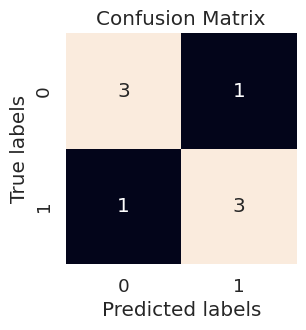

  Kappa Score: 0.5
Fold 2:
  Correctly classified instances: 6
  Incorrectly classified instances: 2
  Accuracy: 75.00%
  Root Mean Squared Error: 0.5
  Relative Absolute Error: 0.5
  True Positive Rate: [1.  0.5]
  False Positive Rate: [0.5 0. ]


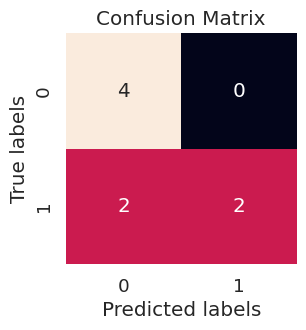

  Kappa Score: 0.5
Fold 3:
  Correctly classified instances: 8
  Incorrectly classified instances: 0
  Accuracy: 100.00%
  Root Mean Squared Error: 0.0
  Relative Absolute Error: 0.0
  True Positive Rate: [1. 1.]
  False Positive Rate: [0. 0.]


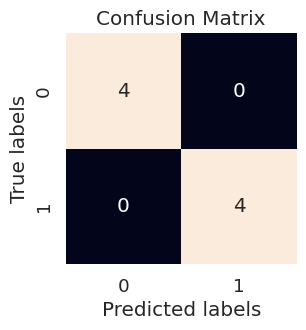

  Kappa Score: 1.0
Fold 4:
  Correctly classified instances: 6
  Incorrectly classified instances: 2
  Accuracy: 75.00%
  Root Mean Squared Error: 0.5
  Relative Absolute Error: 0.5
  True Positive Rate: [1.  0.5]
  False Positive Rate: [0.5 0. ]


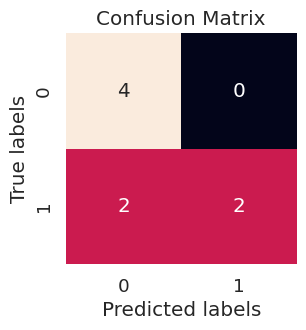

  Kappa Score: 0.5
Fold 5:
  Correctly classified instances: 6
  Incorrectly classified instances: 2
  Accuracy: 75.00%
  Root Mean Squared Error: 0.5
  Relative Absolute Error: 0.0
  True Positive Rate: [0.6 1. ]
  False Positive Rate: [0.  0.4]


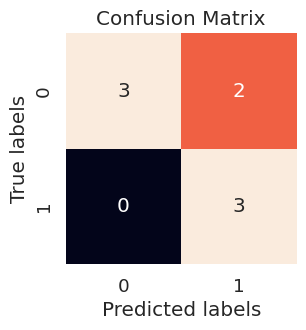

  Kappa Score: 0.5294117647058824
Fold 6:
  Correctly classified instances: 7
  Incorrectly classified instances: 1
  Accuracy: 87.50%
  Root Mean Squared Error: 0.3535533905932738
  Relative Absolute Error: 0.25
  True Positive Rate: [1.   0.75]
  False Positive Rate: [0.25 0.  ]


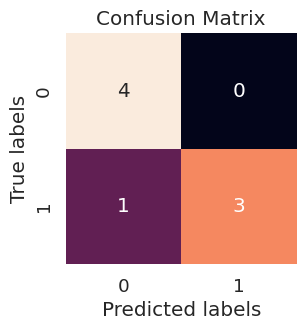

  Kappa Score: 0.75
Fold 7:
  Correctly classified instances: 5
  Incorrectly classified instances: 3
  Accuracy: 62.50%
  Root Mean Squared Error: 0.6123724356957945
  Relative Absolute Error: 0.75
  True Positive Rate: [1.   0.25]
  False Positive Rate: [0.75 0.  ]


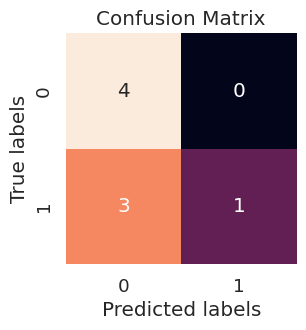

  Kappa Score: 0.25
Fold 8:
  Correctly classified instances: 8
  Incorrectly classified instances: 0
  Accuracy: 100.00%
  Root Mean Squared Error: 0.0
  Relative Absolute Error: 0.0
  True Positive Rate: [1. 1.]
  False Positive Rate: [0. 0.]


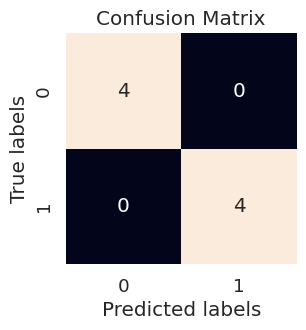

  Kappa Score: 1.0
Fold 9:
  Correctly classified instances: 4
  Incorrectly classified instances: 4
  Accuracy: 50.00%
  Root Mean Squared Error: 0.7071067811865476
  Relative Absolute Error: 0.75
  True Positive Rate: [0.75 0.25]
  False Positive Rate: [0.75 0.25]


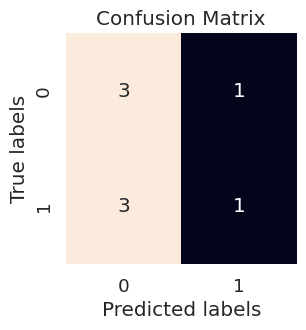

  Kappa Score: 0.0
Fold 10:
  Correctly classified instances: 5
  Incorrectly classified instances: 3
  Accuracy: 62.50%
  Root Mean Squared Error: 0.6123724356957945
  Relative Absolute Error: 0.6
  True Positive Rate: [1.  0.4]
  False Positive Rate: [0.6 0. ]


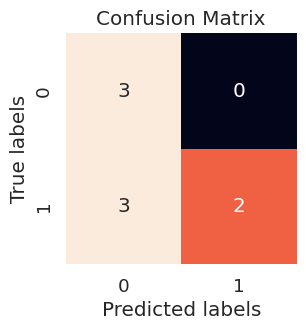

  Kappa Score: 0.3333333333333333


In [ ]:
random.seed(1)

for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
str_column_to_int(dataset, len(dataset[0])-1)
n_folds = 10
scores = evaluate_algorithm2(dataset, naive_bayes, n_folds)

total_correct = sum(score[0] for score in scores)
total_incorrect = sum(score[1] for score in scores)
total_accuracy = total_correct / (total_correct + total_incorrect) * 100.0

for i, score in enumerate(scores, start=1):
    accuracy = score[0] / (score[0] + score[1]) * 100.0
    print(f"Fold {i}:")
    print(f"  Correctly classified instances: {score[0]}")
    print(f"  Incorrectly classified instances: {score[1]}")
    print(f"  Accuracy: {accuracy:.2f}%")
    print(f"  Root Mean Squared Error: {score[4]}")
    print(f"  Relative Absolute Error: {score[5]}")
    print(f"  True Positive Rate: {score[2]}")
    print(f"  False Positive Rate: {score[3]}")
    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1.2)
    sns.heatmap(np.array(score[6]), annot=True, fmt='g', cbar=False, square=True)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    print(f"  Kappa Score: {score[7]}")


Average Evaluation Metrics:
  Mean Correctly classified instances: 6.1
  Mean Incorrectly classified instances: 1.9
  Mean Accuracy: 76.25%
  Mean Root Mean Squared Error: 0.428540504317141
  Mean Relative Absolute Error: 0.36
  Mean True Positive Rate: [0.91 0.64]
  Mean False Positive Rate: [0.36 0.09]
  Mean Confusion Matrix:


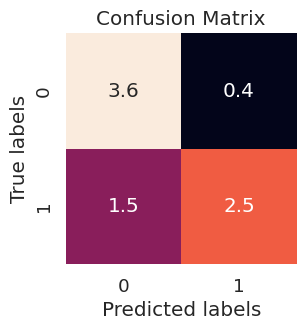

  Mean Kappa Score: 0.5362745098039216


In [ ]:
average_correct = total_correct / n_folds
average_incorrect = total_incorrect / n_folds
average_accuracy = total_accuracy
average_rmse = sum(score[4] for score in scores) / n_folds
average_rae = sum(score[5] for score in scores) / n_folds
average_tp = sum(score[2] for score in scores) / n_folds
average_fp = sum(score[3] for score in scores) / n_folds
average_kappa = sum(score[7] for score in scores) / n_folds
individual_matrices = [score[6] for score in scores]
total_00 = sum(matrix[0][0] for matrix in individual_matrices)/n_folds
total_01 = sum(matrix[0][1] for matrix in individual_matrices)/n_folds
total_10 = sum(matrix[1][0] for matrix in individual_matrices)/n_folds
total_11 = sum(matrix[1][1] for matrix in individual_matrices)/n_folds
average_confusion_matrix = [[total_00, total_01], [total_10, total_11] ]

print("Average Evaluation Metrics:")
print(f"  Mean Correctly classified instances: {total_correct / n_folds}")
print(f"  Mean Incorrectly classified instances: {total_incorrect / n_folds}")
print(f"  Mean Accuracy: {total_accuracy:.2f}%")
print(f"  Mean Root Mean Squared Error: {average_rmse}")
print(f"  Mean Relative Absolute Error: {average_rae}")
print(f"  Mean True Positive Rate: {average_tp}")
print(f"  Mean False Positive Rate: {average_fp}")
print(f"  Mean Confusion Matrix:")
plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(np.array(average_confusion_matrix), annot=True, fmt='g', cbar=False, square=True)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print(f"  Mean Kappa Score: {average_kappa}")

